In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

In [ ]:
#setting up logging

In [4]:
logging.basicConfig(
    filename='data_analysis.log',  # Log file name
    level=logging.INFO,             # Log level
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log message format
)

logging.info('Logger is set up.')


In [6]:
#define Functions for Each Step

In [44]:
def load_data(file_path):
    """Load the dataset and log the process."""
    logging.info('Loading data from %s', file_path)
    try:
        data = pd.read_csv(file_path)
        logging.info('Data loaded successfully with shape %s', data.shape)
        return data
    except Exception as e:
        logging.error('Error loading data: %s', e)
        raise

In [12]:
def preprocess_data(data):
    """Preprocess the data and log the steps."""
    logging.info('Starting data preprocessing...')
    initial_shape = data.shape

    # Strip column names and convert date
    data.columns = data.columns.str.strip()
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Log changes in shape
    logging.info('Data preprocessing completed. Shape changed from %s to %s', initial_shape, data.shape)
    return data

In [14]:
def analyze_sales(data):
    """Analyze sales trends and log the results."""
    logging.info('Analyzing sales data...')
    
    # Example analysis: average sales by day of the week
    data['DayOfWeek'] = data['Date'].dt.day_name()
    sales_summary = data.groupby('DayOfWeek')['Sales'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=sales_summary, x='DayOfWeek', y='Sales', palette='viridis')
    plt.title('Average Sales by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=45)
    plt.savefig('average_sales_by_day.png')
    logging.info('Sales analysis plot saved as average_sales_by_day.png')

    logging.info('Sales analysis completed.')
    return sales_summary

/var/folders/y3/bgq7_1ts2x50tvcr_691gg480000gn/T/ipykernel_48443/2269464620.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
/var/folders/y3/bgq7_1ts2x50tvcr_691gg480000gn/T/ipykernel_48443/811928894.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_summary, x='DayOfWeek', y='Sales', palette='viridis')


KeyError: 'CompetitionDistance'

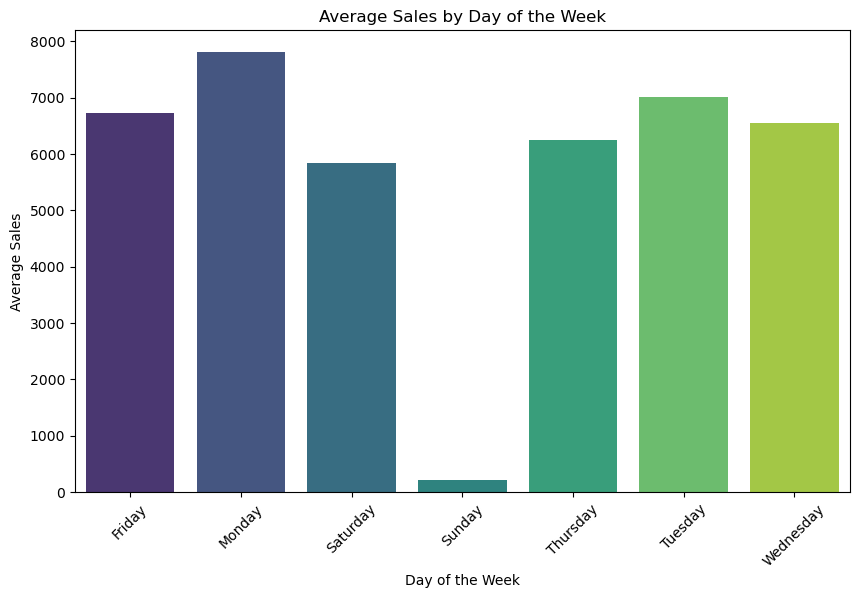

<Figure size 1000x600 with 0 Axes>

In [46]:
def main():
    """Main function to run the analysis."""
    logging.info('Starting the data analysis process...')
    
    # Load data
    data = load_data('/Users/nadianesib/Desktop/rossmann-store-sales/train.csv') 
    # Preprocess data
    data = preprocess_data(data)

    # Analyze sales
    sales_summary = analyze_sales(data)
    logging.info('Sales Summary:\n%s', sales_summary)

    # Analyze competition
    competition_summary = analyze_competition(data)
    logging.info('Competition Summary:\n%s', competition_summary)

    logging.info('Data analysis process completed.')

if __name__ == '__main__':
    main()